In [1]:
%load_ext autoreload
%autoreload 2

from text3d2video.pipelines.base_pipeline import BaseStableDiffusionPipeline
import torch
from diffusers import DPMSolverMultistepScheduler

sd_repo = "runwayml/stable-diffusion-v1-5"
dtype = torch.float16
pipe = BaseStableDiffusionPipeline.from_pretrained(sd_repo, dtype=dtype).to("cuda")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

Keyword arguments {'dtype': torch.float16} are not expected by BaseStableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/home/jorge/miniconda3/envs/thesis4/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
weights = [0, 0.5, 1, 2, 5, 8, 10, 15, 20]

In [4]:
prompt = "Cute Kitten"

n=3

all_ims = []

for guidance_scale in weights:
    gen = torch.Generator(device="cuda")
    gen.manual_seed(0)
    images = pipe([prompt] * n, num_inference_steps=10, guidance_scale=guidance_scale, generator=gen)
    all_ims.append(images)

100%|██████████| 10/10 [00:02<00:00,  3.99it/s]


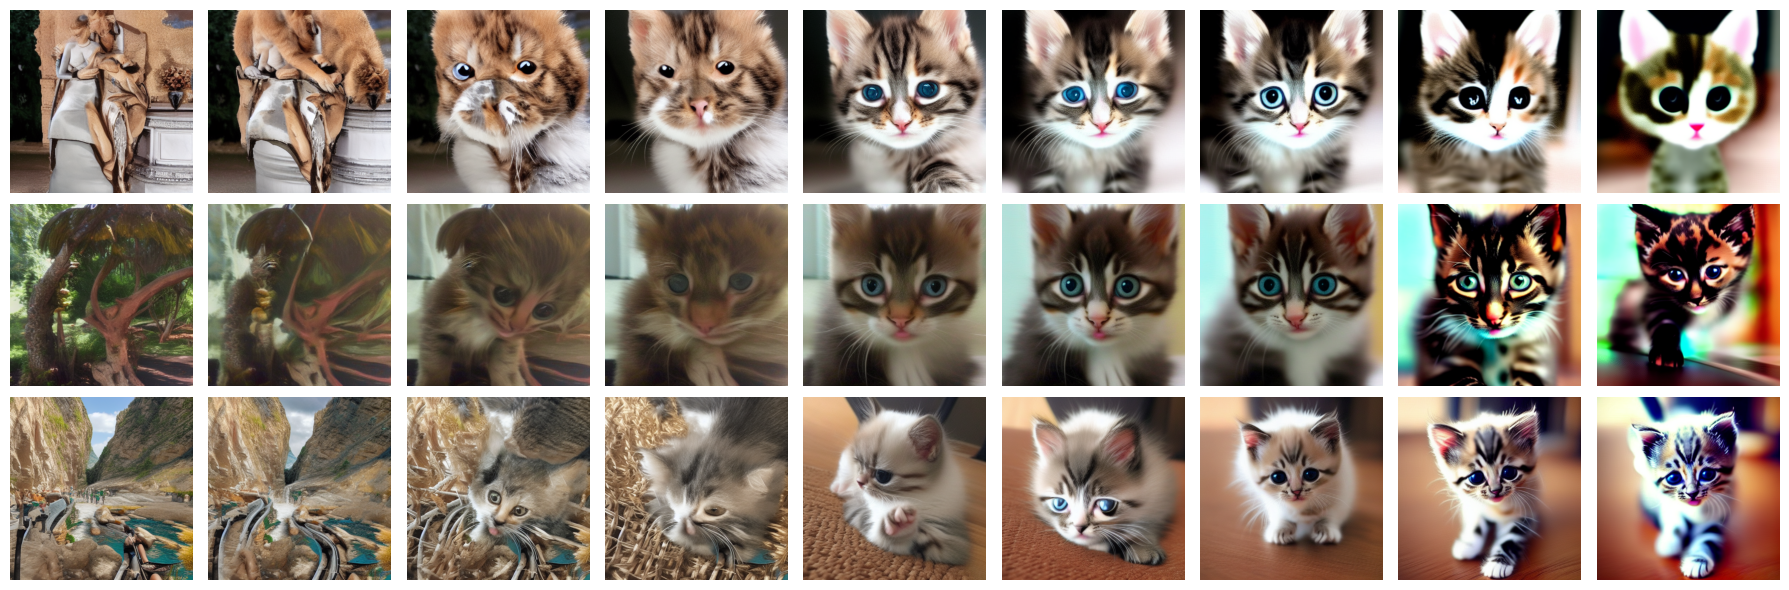

In [59]:
import matplotlib.pyplot as plt

from text3d2video.util import object_array
from text3d2video.utilities.ipython_utils import display_ims_grid


arr = object_array(all_ims)


titles = [f"$\gamma$={g}" for g in weights]
titles = None
display_ims_grid(arr.T, col_titles=titles, scale=2)
plt.savefig('figures/cfg.png', dpi=100)